#**Decision Tree Classifier Assignment - 2**



About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


**Data** = Company_Data.csv

## **Importing Necessary Libraries**

In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Importing Data**

In [104]:
dataset = pd.read_csv('Company_Data.csv')
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## **Initial Analysis**

In [105]:
dataset.shape

(400, 11)

In [106]:
dataset.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [107]:
dataset.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [108]:
dataset.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## **Data Preparation**

In [109]:
import warnings
warnings.filterwarnings('ignore')

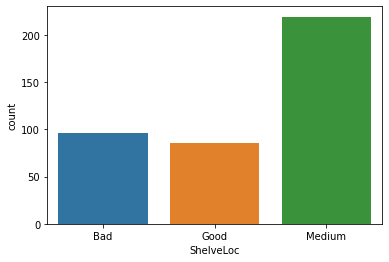

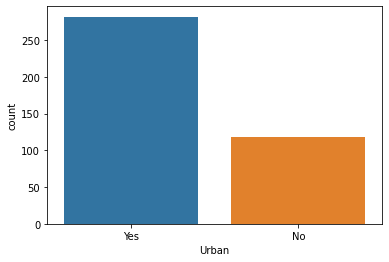

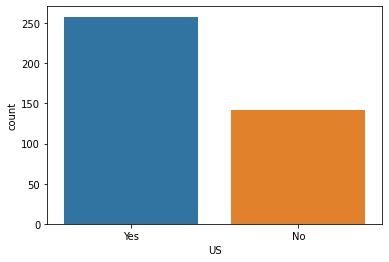

In [110]:
sns.countplot(dataset['ShelveLoc'])
plt.show()

sns.countplot(dataset['Urban'])
plt.show()

sns.countplot(dataset['US'])
plt.show()

####**Converting  attributes into categories**

In [111]:
dataset['Sales'] = pd.cut(x=dataset['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
dataset['CompPrice'] = pd.cut(x=dataset['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

dataset['Income'] = pd.cut(x=dataset['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

dataset['Advertising'] = pd.cut(x=dataset['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

dataset['Population'] = pd.cut(x=dataset['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

dataset['Price'] = pd.cut(x=dataset['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

dataset['Age'] = pd.cut(x=dataset['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

dataset['Education'] = pd.cut(x=dataset['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [112]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


#### **Encoding categorical data**

In [113]:
from sklearn import preprocessing

In [119]:
label_encoder = preprocessing.LabelEncoder()

dataset['Sales'] = label_encoder.fit_transform(dataset['Sales'])
dataset['CompPrice'] = label_encoder.fit_transform(dataset['CompPrice'])
dataset['Income'] = label_encoder.fit_transform(dataset['Income'])
dataset['Advertising'] = label_encoder.fit_transform(dataset['Advertising'])
dataset['Population'] = label_encoder.fit_transform(dataset['Population'])
dataset['Price'] = label_encoder.fit_transform(dataset['Price'])
dataset['ShelveLoc'] = label_encoder.fit_transform(dataset['ShelveLoc'])
dataset['Age'] = label_encoder.fit_transform(dataset['Age'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Urban'] = label_encoder.fit_transform(dataset['Urban'])
dataset['US'] = label_encoder.fit_transform(dataset['US'])

In [121]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


## **Model Building**

In [127]:
x =dataset.drop(labels='Sales', axis=1)
y =dataset[['Sales']]

In [128]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [129]:
y

,Sales
0,2
1,2
2,2
3,2
4,1
...,...
395,0
396,2
397,2
398,1


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

In [131]:
x_train.shape, x_test.shape

((320, 10), (80, 10))

In [132]:
y_train.shape,y_test.shape

((320, 1), (80, 1))

## **Model Training**

In [133]:
from sklearn.tree import DecisionTreeClassifier
DT_model  = DecisionTreeClassifier(criterion='entropy',max_depth=4)
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

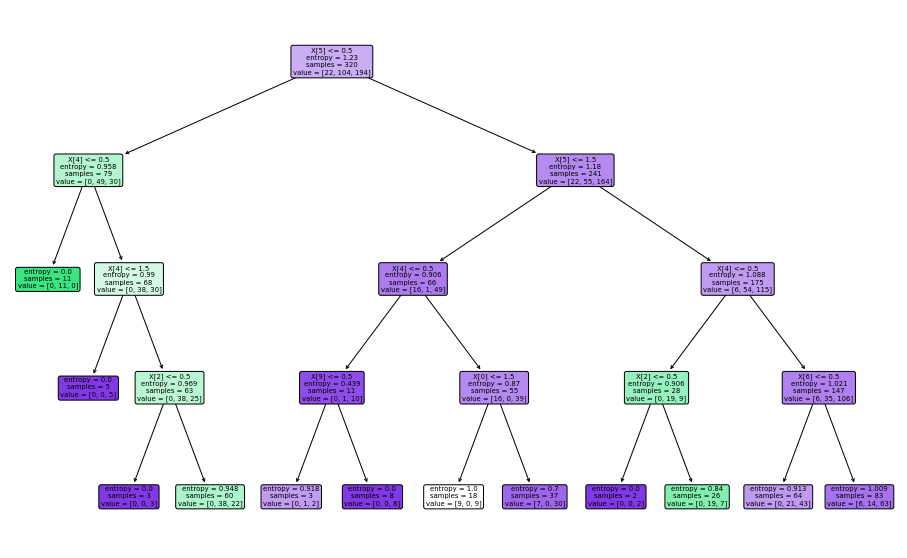

In [134]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(DT_model,rounded=True,filled=True)
plt.show()

In [135]:
from sklearn.model_selection import GridSearchCV
Grid_search_cv = GridSearchCV(estimator = DT_model, param_grid = {'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']},cv=5)
Grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [136]:
Grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [138]:
Grid_search_cv.best_score_

0.678125

In [139]:
from sklearn.model_selection import cross_val_score,KFold #Explore Kfold
cv_scores = cross_val_score(estimator = DT_model, X = x, y=y,cv=5)
print('5 Fold CV scores   : ',cv_scores)
print('Mean Accuracy      : ',round(cv_scores.mean(),4))
print('STD Deviation      : ',round(cv_scores.std(),4))


5 Fold CV scores   :  [0.6625 0.6625 0.7625 0.6875 0.6875]
Mean Accuracy      :  0.6925
STD Deviation      :  0.0367


## **Model Testing**

In [140]:
y_train_pred = DT_model.predict(x_train)
y_train_pred

array([0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,

In [141]:
y_test_pred = DT_model.predict(x_test)
y_test_pred

array([2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1])

## **Model Evaluation**

In [142]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

Training data

In [143]:
accuracy_score(y_train,y_train_pred)

0.728125

In [147]:
confusion_matrix(y_train,y_train_pred)

array([[  9,   0,  13],
       [  0,  68,  36],
       [  9,  29, 156]])

Test data

In [145]:
accuracy_score(y_test,y_test_pred)

0.725

In [146]:
confusion_matrix(y_test,y_test_pred)

array([[ 3,  0,  2],
       [ 0, 17,  9],
       [ 2,  9, 38]])

##**Model Deployement**

In [149]:
from pickle import dump

In [150]:
dump(DT_model,open('DT_model_pkl','wb'))

In [151]:
from pickle import load 

In [152]:
DT_model_pickle = load(open('DT_model_pkl','rb'))

In [153]:
pickle_pred = DT_model_pickle.predict(x_test)